# Prepare Data for Workshop

Workshop: https://github.com/IBMDeveloperUK/foss4g-geopandas

Data downloaded from https://data.police.uk/data/ for Metropolitan Police Service into `/data/crime_data` folder, unzipped and all files moved to one folder `/data/crime_data/by_year`.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import zipfile

## Convert crime data to easier readable format

These files are uploaded to https://github.com/IBMDeveloperUK/foss4g-geopandas/tree/master/data

In [18]:
years = ['2017','2018']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

for year in years:
    for month in months:
        if month == '01':
            df = pd.read_csv("/Users/margriet/projects/geopandas-workshop/data/crime_data/"+year+"-"+month+"-metropolitan-stop-and-search.csv")
        else:
            df2 = pd.read_csv("/Users/margriet/projects/geopandas-workshop/data/crime_data/"+year+"-"+month+"-metropolitan-stop-and-search.csv")
            df = df.append(df2)
    df = df.drop(columns=['Self-defined ethnicity',
                                  'Officer-defined ethnicity','Removal of more than just outer clothing'])
    df.to_csv("/Users/margriet/projects/geopandas-workshop/data/crime_data/by_year/"+year+"-metropolitan-stop-and-search.csv")
    zip_file = zipfile.ZipFile("/Users/margriet/projects/geopandas-workshop/data/crime_data/by_year/"+year+"-metropolitan-stop-and-search.zip", 'w')
    zip_file.write("/Users/margriet/projects/geopandas-workshop/data/crime_data/by_year/"+year+"-metropolitan-stop-and-search.csv", compress_type=zipfile.ZIP_DEFLATED)
    zip_file.close()

!rm data/crime_data/by_year/*.csv

rm: data/crime_data/by_year/*.csv: No such file or directory


In [ ]:
years = ['2017','2018']
months = ['01','02','03','04','05','06']

for year in years:
    for month in months:
        if month == '01':
            df = pd.read_csv("data/crime_data/"+year+"-"+month+"-metropolitan-street.csv")
        else:
            df2 = pd.read_csv("data/crime_data/"+year+"-"+month+"-metropolitan-street.csv")
            df = df.append(df2)
    df = df.drop(columns=['Reported by','Falls within','LSOA name'])
    df.to_csv("data/crime_data/by_year/"+year+"-1-metropolitan-street.csv")
    zip_file = zipfile.ZipFile("data/crime_data/by_year/"+year+"-1-metropolitan-street.zip", 'w')
    zip_file.write("data/crime_data/by_year/"+year+"-1-metropolitan-street.csv", compress_type=zipfile.ZIP_DEFLATED)
    zip_file.close()

!rm data/crime_data/by_year/*.csv

In [ ]:
years = ['2017','2018']
months = ['07','08','09','10','11','12']

for year in years:
    for month in months:
        if month == '07':
            df = pd.read_csv("data/crime_data/"+year+"-"+month+"-metropolitan-street.csv")
        else:
            df2 = pd.read_csv("data/crime_data/"+year+"-"+month+"-metropolitan-street.csv")
            df = df.append(df2)
    df = df.drop(columns=['Reported by','Falls within','LSOA name'])
    df.to_csv("data/crime_data/by_year/"+year+"-2-metropolitan-street.csv")
    zip_file = zipfile.ZipFile("data/crime_data/by_year/"+year+"-2-metropolitan-street.zip", 'w')
    zip_file.write("data/crime_data/by_year/"+year+"-2-metropolitan-street.csv", compress_type=zipfile.ZIP_DEFLATED)
    zip_file.close()

!rm data/crime_data/by_year/*.csv

## Clean up Borough shape files

In [ ]:
# https://data.london.gov.uk/dataset/2011-boundary-files
# Included are Output Area (OA), Lower Super Output Area (LSOA) and Middle-Level Super Output Area (MSOA) bounadries.
#Each geography is provided at Extent of the Realm (BFE), Coastline (BFC) and Generalised Coastline (BGC).

Boundaries = gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_City_of_London.shp")
#Boundaries[]
Boundaries.plot();

In [ ]:
Boundaries = Boundaries.append(gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_Westminster.shp"))
Boundaries.plot();

In [ ]:
Boundaries = Boundaries.append(gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_Camden.shp"))
Boundaries = Boundaries.append(gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_Islington.shp"))
Boundaries = Boundaries.append(gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_Hackney.shp"))
Boundaries = Boundaries.append(gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_Tower_Hamlets.shp"))
Boundaries = Boundaries.append(gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_Southwark.shp"))
Boundaries = Boundaries.append(gpd.read_file("data/2011_london_boundaries/LSOA_2011_BFE_London/LSOA_2011_BFE_Lambeth.shp"))

Boundaries.plot();

In [ ]:
Boundaries.plot(column='POPDEN',cmap="Reds",scheme='quantiles');

In [ ]:
Boundaries.head()

In [ ]:
Boundaries.to_file("data/boundaries.shp")

## Convert to lat/lon - work in progress

In [ ]:
#https://pypi.org/project/OSGridConverter/
#!pip install OSGridConverter

#from OSGridConverter import grid2latlong

#l=grid2latlong('TG 532151  181867')
#(l.latitude,l.longitude)

In [ ]:
#from OSGridConverter import latlong2grid
#g=latlong2grid(51.993742,-0.975257, tag = ‘WGS84’)
#str(g)

## boroughs in lat/lon

In [2]:
#https://skgrange.github.io/www/data/london_boroughs.json

#boroughs2 = gpd.read_file("data/london_boroughs.json")

# load data from a url
boroughs2 = gpd.read_file("https://skgrange.github.io/www/data/london_boroughs.json")
boroughs2.tail()

,id,name,code,area_hectares,inner_statistical,geometry
28,29,Hackney,E09000012,1904.902,1,(POLYGON ((-0.097664742057559 51.5736522020517...
29,30,Haringey,E09000014,2959.837,1,(POLYGON ((-0.097664742057559 51.5736522020517...
30,31,Newham,E09000025,3857.806,1,"(POLYGON ((0.075487345438734 51.5298237426242,..."
31,32,Barking and Dagenham,E09000002,3779.934,0,(POLYGON ((0.07316567606867801 51.529370200593...
32,33,City of London,E09000001,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -..."


In [ ]:
boroughs2.plot();

In [4]:
#london = boroughs2.dissolve(by='inner_statistical',aggfunc='sum')
#london
#london.head()

boroughs2['all'] = 1
london = boroughs2.dissolve(by='all',aggfunc='sum')
london.head()

,geometry,id,area_hectares,inner_statistical
all,,,,
1,"POLYGON ((-0.064021239620113 51.3186376598749,...",561,159469.725,14


## Bounding box for extracting London OSM data

In [5]:
bounding_box = london.envelope


In [6]:
bb = gpd.GeoDataFrame(gpd.GeoSeries(bounding_box), columns=['geometry'])
bb.head()

,geometry
all,
1,"POLYGON ((-0.510375110883981 51.2867601624255,..."


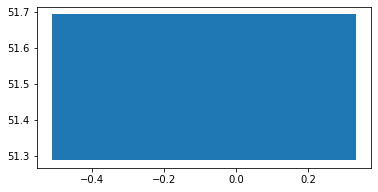

In [7]:
bb.plot();

In [9]:
#london2 = london.drop([0, 0])
#london2.head()

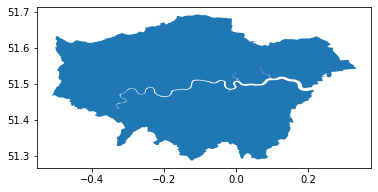

In [10]:
london.plot();

In [11]:
xmin, ymin, xmax, ymax = london.total_bounds
xmin, ymin, xmax, ymax

(-0.510375110883981, 51.2867601624255, 0.334015521940495, 51.6918741160805)

## Open Street Map data

In [ ]:
# http://download.geofabrik.de/europe/great-britain.html

roads_all = gpd.read_file("/Users/margriet/projects/geopandas-workshop/data/england-latest-free/gis_osm_roads_free_1.shp")
roads_all.head()


In [ ]:
roads = roads_all.cx[xmin:xmax, ymin:ymax]

In [ ]:
roads.to_file("data/london_inner_roads.shp")

In [13]:
pois_all = gpd.read_file("/Users/margriet/projects/geopandas-workshop/data/england-latest-free/gis_osm_pois_free_1.shp")
pois_all.head()


,osm_id,code,fclass,name,geometry
0,129,2525,mobile_phone_shop,Vodafone,POINT (-1.0815173 53.9593574)
1,108042,2304,pub,Simmons,POINT (-0.1355294 51.5235359)
2,108539,2566,bicycle_rental,Windsor Terrace,POINT (-0.09338780000000001 51.5291251)
3,212781,2907,camera_surveillance,None,POINT (-1.912191 52.5305434)
4,251191,2742,viewpoint,Gibbet Hill,POINT (-0.7159181999999999 51.1154437)


In [14]:
pois = pois_all.cx[xmin:xmax, ymin:ymax]

In [17]:
pois.to_file("../data/london_pois.shp")